In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp

In [2]:
sns.set(style = 'dark' , palette = 'pastel' , color_codes = 'True')
sns.mpl.rc('figure',figsize = (16,14))

In [3]:
%matplotlib inline

In [4]:
path = 'Igismap/Indian_States.shp'
sf = shp.Reader(path)

In [5]:
sf.records()

[Record #0: ['Andaman & Nicobar Island'],
 Record #1: ['Arunanchal Pradesh'],
 Record #2: ['Assam'],
 Record #3: ['Bihar'],
 Record #4: ['Chandigarh'],
 Record #5: ['Chhattisgarh'],
 Record #6: ['Dadara & Nagar Havelli'],
 Record #7: ['Daman & Diu'],
 Record #8: ['Goa'],
 Record #9: ['Gujarat'],
 Record #10: ['Haryana'],
 Record #11: ['Himachal Pradesh'],
 Record #12: ['Jammu & Kashmir'],
 Record #13: ['Jharkhand'],
 Record #14: ['Karnataka'],
 Record #15: ['Kerala'],
 Record #16: ['Lakshadweep'],
 Record #17: ['Madhya Pradesh'],
 Record #18: ['Maharashtra'],
 Record #19: ['Manipur'],
 Record #20: ['Meghalaya'],
 Record #21: ['Mizoram'],
 Record #22: ['Nagaland'],
 Record #23: ['NCT of Delhi'],
 Record #24: ['Puducherry'],
 Record #25: ['Punjab'],
 Record #26: ['Rajasthan'],
 Record #27: ['Sikkim'],
 Record #28: ['Tamil Nadu'],
 Record #29: ['Telangana'],
 Record #30: ['Tripura'],
 Record #31: ['Uttar Pradesh'],
 Record #32: ['Uttarakhand'],
 Record #33: ['West Bengal'],
 Record #34: [

In [6]:
sf.fields

[('DeletionFlag', 'C', 1, 0), ['st_nm', 'C', 24, 0]]

In [7]:
sf.shapes()[20].points

[(91.85632059991582, 26.10352981215118),
 (91.86717193303832, 26.099060826396055),
 (91.87825170115514, 26.09643850942973),
 (91.87766864639099, 26.08327089593513),
 (91.87175985952996, 26.05557043692619),
 (91.8725598172818, 26.050897514608664),
 (91.88559457033324, 26.028693776696514),
 (91.89429990431717, 26.028231679848204),
 (91.90326149022565, 26.024942486806367),
 (91.90977809558268, 26.025773377639325),
 (91.91397192656319, 26.022488379035508),
 (91.9192782135188, 26.02011519226238),
 (91.9191478280099, 26.012410524925826),
 (91.91794240551764, 26.008984866058768),
 (91.92099889088615, 26.00589283948301),
 (91.92181206687343, 26.000239577894263),
 (91.92184891029905, 25.998782454946365),
 (91.92436635372428, 25.998169362825877),
 (91.92810568442985, 25.998381210724347),
 (91.92908929003875, 26.000258722661954),
 (91.93017574931145, 26.002241727773594),
 (91.93623655847045, 26.01330249501416),
 (91.94356157970321, 26.0126248450606),
 (91.94858543546951, 26.01312550483823),
 (91.

In [8]:
def shape_to_df(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    loc = [s.points for s in sf.shapes()]
    
    location = pd.DataFrame(data = records , columns = fields)
    location = location.assign(coordinates = loc)
    return location

In [9]:
location = shape_to_df(sf)
location.head(5)

,st_nm,coordinates
0,Andaman & Nicobar Island,"[(93.71975948121514, 7.2070676362624795), (93...."
1,Arunanchal Pradesh,"[(96.16260946675357, 29.380784745020037), (96...."
2,Assam,"[(89.74322932956994, 26.303620341105898), (89...."
3,Bihar,"[(84.50719832504274, 24.263231032086537), (84...."
4,Chandigarh,"[(76.84147287327454, 30.759959340351315), (76...."


In [10]:
location.coordinates.shape

(36,)

In [11]:
location.shape

(36, 2)

In [12]:
sf.shape(20).points[0]

(91.85632059991582, 26.10352981215118)

In [13]:
def plot_state(index,state):
    plt.figure(figsize=(14,12))
    axes = plt.axes()
    axes.set_aspect('equal')
    cord = sf.shape(index)
    longitude = np.zeros((len(cord.points) , 1))
    latitude = np.zeros((len(cord.points) , 1))
    for i in range(len(cord.points)):
        longitude[i] = cord.points[i][0]
        latitude[i] = cord.points[i][1]
    
    plt.plot(longitude,latitude,'black')
    x0 = np.mean(longitude)
    y0 = np.mean(latitude)
    plt.text(x0,y0,state,fontsize = 20)
    plt.xlim(cord.bbox[0] , cord.bbox[2])

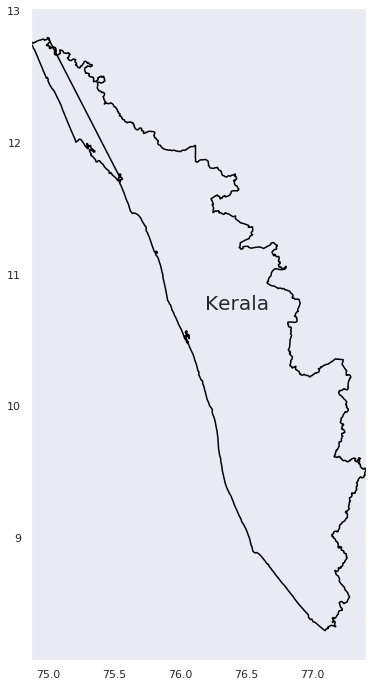

In [21]:
plot_state(15,location.st_nm[15])

In [16]:
sf.shapeRecords()[0].shape.points

[(93.71975948121514, 7.2070676362624795),
 (93.71908835314503, 7.206733376244358),
 (93.7184177412858, 7.20690153867514),
 (93.71774713032585, 7.207069700206546),
 (93.71690873554974, 7.2071542931361705),
 (93.715818883135, 7.207322880046945),
 (93.71498057379449, 7.207491207952955),
 (93.7140582443925, 7.207492145046501),
 (93.71347139359, 7.207576478072042),
 (93.7130525784138, 7.207995589125176),
 (93.71280137348464, 7.208330793431401),
 (93.71279292705202, 7.208354972603956),
 (93.71237678735889, 7.209546236169899),
 (93.7122167278198, 7.210592295198296),
 (93.71205013380671, 7.211681050440177),
 (93.71213491649326, 7.212602076724522),
 (93.71213593632444, 7.213606924320175),
 (93.71205302063044, 7.214528120576347),
 (93.71180232112027, 7.215365748230738),
 (93.71138358238647, 7.215868596058897),
 (93.71088158621632, 7.216957688546529),
 (93.7108822643051, 7.2176275881427046),
 (93.71079943044941, 7.218632520274639),
 (93.71029692166564, 7.219219188514785),
 (93.70979424380937, 7.2

In [17]:
def plot_country(sf , df):
    x_lim ,y_lim = None , None
    id = 0
    plt.figure(figsize=(16,14))
    
    for s in sf.shapeRecords():
        x = [i[0] for i in s.shape.points[:]]
        y = [i[1] for i in s.shape.points[:]]
        plt.plot(x,y,'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0,y0,id,fontsize = 15)
        id += 1
        
        if (x_lim != None) & (y_lim != None):
            plt.xlim(x_lim)
            plt.ylim(y_lim)

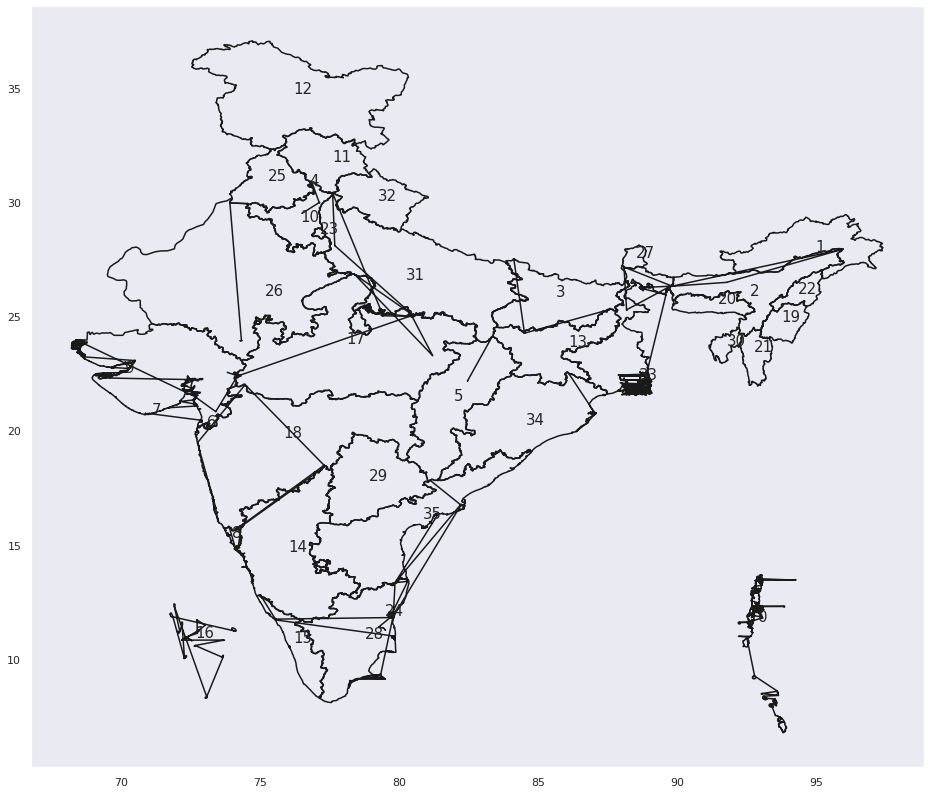

In [18]:
plot_country(sf,location)